In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("Processed_IOS_CTD_Profiles.csv")

In [10]:
print(data.dtypes)

time                            datetime64[ns, UTC]
longitude                                   float64
latitude                                    float64
depth                                       float64
sea_water_temperature                       float64
sea_water_practical_salinity                float64
dtype: object


In [4]:
data['depth'] = -1 * data['depth']
data.loc[data['longitude'] > 0, 'longitude'] = -data['longitude']
data['time'] = pd.to_datetime(data['time'])


In [5]:
max_longitude = data['longitude'].max()
min_longitude = data['longitude'].min()
max_latitude = data['latitude'].max()
min_latitude = data['latitude'].min()
print("Max Longitude:", max_longitude)
print("Min Longitude:", min_longitude)
print("Max Latitude:", max_latitude)
print("Min Latitude:", min_latitude)

Max Longitude: -53.260166
Min Longitude: -175.213
Max Latitude: 83.0295
Min Latitude: -11.997833


In [6]:

#data = data[(data['latitude'] >= -11.997833) & (data['latitude'] <= 50) & (data['longitude'] <= -160)]


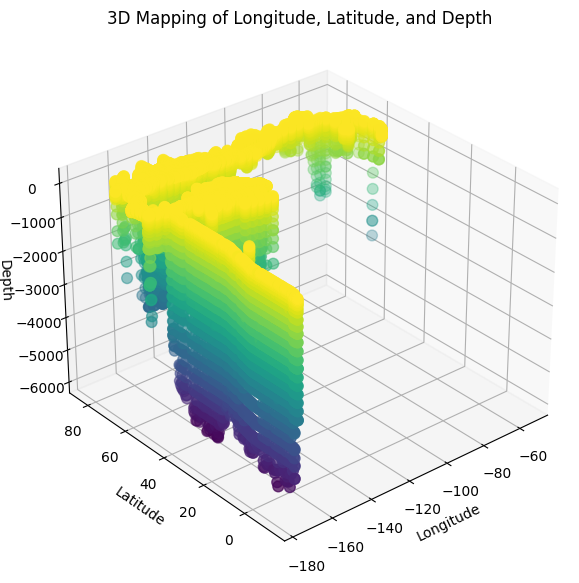

In [7]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['longitude'], data['latitude'], data['depth'], c=data['depth'], cmap='viridis', s=60)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth')
ax.set_title('3D Mapping of Longitude, Latitude, and Depth')
ax.view_init(elev=30, azim=230)

plt.show()

In [8]:
max_time = data['time'].max()
min_time = data['time'].min()

print("Max time:", max_time)
print("Min time:", min_time)

Max time: 2023-06-03 21:34:08+00:00
Min time: 1974-08-11 01:03:00+00:00


In [ ]:
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day
data['hour'] = data['time'].dt.hour


In [12]:


X = data[['time', 'longitude', 'latitude', 'depth']]
y = data['sea_water_temperature']
X['time'] = (X['time'] - X['time'].min()) / pd.Timedelta(seconds=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler_X = MinMaxScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = MinMaxScaler().fit(y_train.values.reshape(-1, 1))
y_train = scaler_y.transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

time_steps = 10
x_dim = 8
y_dim = 8
z_dim = 8


X_train = X_train.reshape(X_train.shape[0], time_steps, x_dim, y_dim, z_dim)
X_test = X_test.reshape(X_test.shape[0], time_steps, x_dim, y_dim, z_dim)

C:\Users\gjftn\AppData\Local\Temp\ipykernel_7452\3783769630.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['time'] = (X['time'] - X['time'].min()) / pd.Timedelta(seconds=1)


ValueError: cannot reshape array of size 549360 into shape (137340,10,8,8,8)